[nltk_data] Downloading package wordnet to /home/tomd/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/tomd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/tomd/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
2024-04-24 02:18:20,867 - INFO - Data loaded successfully.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2912 entries, 0 to 2911
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2912 non-null   object 
 1   nif_code              2912 non-null   object 
 2   web_site              2912 non-null   object 
 3   linkedin_url          2912 non-null   object 
 4   about                 2912 non-null   object 
 5   Label                 2912 non-null   int64  
 6   website_url           2908 non-null   object 
 7   blog_url              0 non-null      float64
 8   angellist_url         21 non-null     object 
 9   twitter_url           1006 non-null   object 
 10  facebook_url          1263 non-null   object 
 11  primary_phone         2912 non-null   object 
 12  languages             2912 non-null   object 
 13  alexa_ranking         268 non-null    float64
 14  phone                 2181 non-null   object 
 15  linkedin_uid         

2024-04-24 02:18:22,555 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/tmp/ipykernel_147990/3129562788.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index.astype(str), y=label_counts.values, palette='husl')
2024-04-24 02:18:22,560 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


                                       cleaned_about  \
0  high quality perfection result one hundred ste...   
1  best ham world​ iffa international frankfurt t...   
2          mundo necesita gente aguacatera ame hace​   
3  valor trabajo bien hecho​ grupo financiero ind...   
4  fabricación distribución complementos alimenti...   

                                    cleaned_keywords  
0                           diseno calzado moda lujo  
1  acornfed ham jamon iberico bellota productos i...  
2                                            avocado  
3  asset management ciclo economico sectores anal...  
4  rosa mosqueta g7 defender silicium g5 siliplan...  


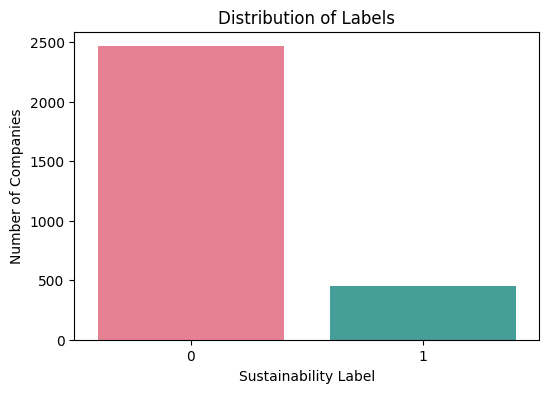

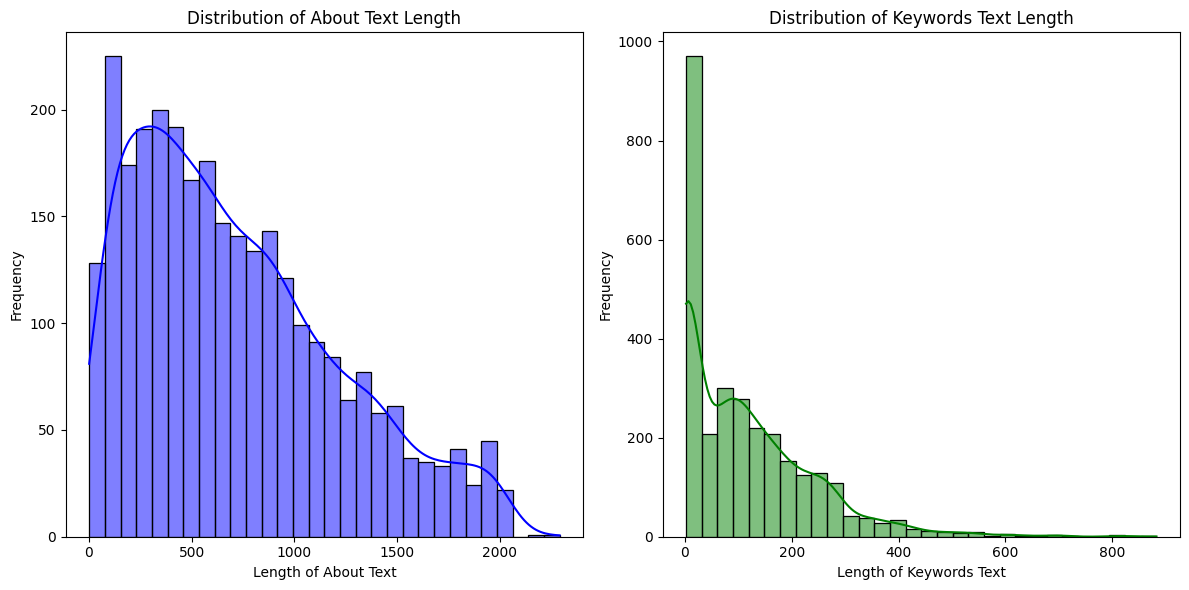

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import nltk
import logging
import os
import traceback  # Import for handling tracebacks

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Ensure you have these NLTK resources downloaded
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')  # For multilingual lemmatization support

# Load the dataset
file_path = 'Data/challenge - dataset.csv'
try:
    data = pd.read_csv(file_path)
    logging.info("Data loaded successfully.")
except Exception as e:
    logging.error("Failed to load data: {}".format(e))
    traceback.print_exc()  # Print the traceback when loading data fails
    raise SystemExit(e)

# Display basic information about the dataset
print(data.info())

# Function to check if the environment supports displaying plots
def can_display():
    return 'DISPLAY' in os.environ

# Label Distribution Analysis
def plot_label_distribution():
    try:
        data['Label'] = data['Label'].astype('category')
        label_counts = data['Label'].value_counts().sort_index()
        plt.figure(figsize=(6,4))
        sns.barplot(x=label_counts.index.astype(str), y=label_counts.values, palette='husl')
        plt.title('Distribution of Labels')
        plt.xlabel('Sustainability Label')
        plt.ylabel('Number of Companies')
        if can_display():
            plt.show()
        else:
            plt.savefig('Plot/label_distribution.png')
        plt.close()
    except Exception as e:
        logging.error("Failed to plot label distribution: {}".format(e))
        traceback.print_exc()

# Text Characteristics Analysis
def analyze_text_characteristics():
    try:
        data['about_length'] = data['about'].apply(len)
        data['keywords_length'] = data['keywords'].apply(len)
        
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(data['about_length'], bins=30, color='blue', kde=True)
        plt.title('Distribution of About Text Length')
        plt.xlabel('Length of About Text')
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        sns.histplot(data['keywords_length'], bins=30, color='green', kde=True)
        plt.title('Distribution of Keywords Text Length')
        plt.xlabel('Length of Keywords Text')
        plt.ylabel('Frequency')
        plt.tight_layout()

        if can_display():
            plt.show()
        else:
            plt.savefig('Plot/text_characteristics.png')
        plt.close()
    except Exception as e:
        logging.error("Failed to analyze text characteristics: {}".format(e))
        traceback.print_exc()

# Advanced Text Preprocessing
def preprocess_text(text, language='english'):
    try:
        text = text.lower()
        text = ''.join([char for char in text if char not in string.punctuation])
        stop_words = set(stopwords.words('english')).union(set(stopwords.words('spanish')))
        text = ' '.join([word for word in text.split() if word not in stop_words])
        lemmatizer = WordNetLemmatizer()
        text = ' '.join([lemmatizer.lemmatize(word, pos='n') for word in text.split()])
        return text
    except Exception as e:
        logging.error("Failed to preprocess text: {}".format(e))
        traceback.print_exc()

# Apply preprocessing to 'about' and 'keywords'
data['cleaned_about'] = data['about'].apply(preprocess_text)
data['cleaned_keywords'] = data['keywords'].apply(preprocess_text)

# Display the cleaned text
print(data[['cleaned_about', 'cleaned_keywords']].head())

# Generate and save plots
plot_label_distribution()
analyze_text_characteristics()
